# Log Parser Notebook
Exploratory notebook for testing out parsing the logs for workflow statistics


In [ ]:
%load_ext autoreload
%autoreload 2
import logging
import datetime
import time
import glob

import os
filenames = sorted(glob.glob(os.path.join(os.path.dirname(os.getcwd()), "log/run/**/*.log")))

# log_path = configure_logging(os.path.join(os.path.dirname(os.getcwd()), "log/run/123456.789"))

In [ ]:
# TODO: better logs: https://www.toptal.com/python/in-depth-python-logging
def configure_logging(save_path='', log_filename='logfile', log_level=logging.INFO):
    """Log to the terminal and to file simultaneously."""
    timestamp = datetime.datetime.fromtimestamp(time.time()).strftime(
        '%Y%m%d.%H%M%S')  # datetime.now().strftime("_%Y-%m-%d_%H-%M-%S")
    logging.basicConfig(
        format="%(asctime)s — %(name)s — %(levelname)s — %(funcName)s:%(lineno)d — %(message)s", #"%(asctime)s %(levelname)s %(message)s",
        level=log_level,
        # Multiple handlers can be added to your logging configuration.
        # By default log messages are appended to the file if it exists already
        handlers=[
            logging.FileHandler(save_path+'/'+log_filename+timestamp+'.log'),
            logging.StreamHandler(),
        ])
    return save_path+'/'+log_filename+timestamp+'.log'


### Fake Log Generator

In [ ]:
import random
# generate random log messages
supported_feature_types = ["image_centre", "lamella_centre", "needle_tip", "lamella_edge", "landing_post"]
for i in range(100):


    RANDOM_NUM = random.randint(0, 5)

    if RANDOM_NUM > 4:
        feature_type = random.choice(supported_feature_types)
        response = random.choice([True, False])
        logging.info(f"ml_detection: {feature_type}: {response}")
    elif RANDOM_NUM > 3:
        diff = random.randint(-120, 120)
        gam = random.random() * 2.0
        logging.info(f"gamma_correction: diff: {diff:.3f}: gam: {gam:.3f} ")
    
    else:
        logging.info(f"random other log message not with the same structure {random.random():.2f}")


## Log Parser

In [ ]:

from LogParser import parse_log_file, plot_ml_data, plot_gamma_data
from pprint import pprint

filenames = sorted(glob.glob(os.path.join(os.path.dirname(os.getcwd()), "log/run/**/*.log")))
log_path = filenames[-1]
# log_path = r"C:\Users\Admin\Github\autoliftout\liftout\log\run\20211020.155258\logfile_20211020.155258.log"
log_path = r"C:\Users\Admin\Github\autoliftout\liftout\log\run\20211027.160458/logfile_20211027.160458.log"
# log_path = r"C:\Users\Admin\Github\autoliftout\liftout\log\run\20211027.165108/logfile_20211027.165108.log"
print(log_path)
score_dict, gamma_dict, stage_dict = parse_log_file(log_path)
pprint(score_dict)
# pprint(gamma_dict)
# pprint(stage_dict)

## Machine Learning Evaluation

In [ ]:
# eval
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: better plots and analysis

plot_ml_data(score_dict)


In [ ]:
plot_gamma_data(gamma_dict)

## Gamma Correction Evaluation
evaluate the average gamma correction


In [ ]:

# pprint(gamma_dict)
# df_gamma = pd.DataFrame(gamma_dict)
# print(df_gamma)

# df_gamma["gamma"].plot.hist(bins=5, alpha=0.5, title="Gamma Correction Distribution")

### Status Evaluation

In [ ]:
# pprint(stage_dict)

state_duration_dict = {}
for state in stage_dict.keys():
#     print(stage_dict[state])
    if stage_dict[state]["FINISHED"] and stage_dict[state]["STARTED"]:
        state_duration = stage_dict[state]["FINISHED"] - stage_dict[state]["STARTED"]
        print(f"{state}: {state_duration}") 
        state_duration_dict[state] = state_duration.total_seconds()
        
        
import pandas as pd

print(state_duration_dict)
df = pd.DataFrame([state_duration_dict])
df.plot.bar(title="State Duration")

In [ ]:
# TODO: read sample.yaml and plot the coordinates
log_dir = r"C:\Users\Admin\Github\autoliftout\liftout\log\run\20211027.160458"
yaml_file = os.path.join(log_dir, "sample.yaml")
print(yaml_file)

%matplotlib inline
import yaml
with open(yaml_file, 'r') as f:
    sample_yaml = yaml.safe_load(f)


for sample_no in sample_yaml["sample"].keys():
    lamella_coords = sample_yaml["sample"][sample_no]["lamella_coordinates"]
    x, y = lamella_coords["x"], lamella_coords["y"]
    print(x, y)
    plt.scatter(x, y, label=sample_no)

plt.legend(loc="best")
plt.ylim(-0.005, 0)
plt.xlim(0.002, 0.005)
# plt.scatter(plot_coords_x, plot_coords_y, label="hello")
plt.show()

# Extract data for labelling


In [ ]:
from liftout.detection import utils

In [ ]:
%matplotlib inline
log_dir = os.path.dirname(os.path.dirname(log_path))
utils.extract_img_for_labelling(log_dir)

# Report Generation
Automatically generate a report summarising the liftout run


In [1]:
import os
import glob

filenames = sorted(glob.glob(os.path.join(os.path.dirname(os.getcwd()), "log/run/**/*.log")))

print(filenames)

['/Users/patrickcleeve/Documents/university/bio/demarco/autoliftout/liftout/log/run/123456.789/logfile20211026.135808.log', '/Users/patrickcleeve/Documents/university/bio/demarco/autoliftout/liftout/log/run/123456.789/logfile20211026.175840.log', '/Users/patrickcleeve/Documents/university/bio/demarco/autoliftout/liftout/log/run/123456.789/logfile20211026.180929.log', '/Users/patrickcleeve/Documents/university/bio/demarco/autoliftout/liftout/log/run/123456.789/logfile20211026.181128.log', '/Users/patrickcleeve/Documents/university/bio/demarco/autoliftout/liftout/log/run/20211027.160458/logfile_20211027.160458.log']


   a  b  c
0  1  2  3
1  4  5  6
2  7  8  9


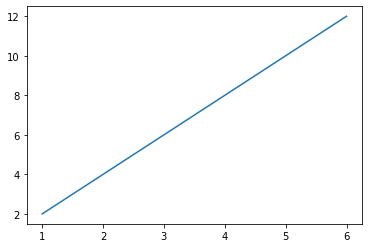

In [11]:


# https://www.justintodata.com/generate-reports-with-python/
# https://www.xlwings.org/blog/reporting-with-python

# CSS
# https://pythonhow.com/python-tutorial/flask/Adding-CSS-styling-to-your-website/

import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np

import pandas as pd

df = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])

print(df)

xs = np.array([1, 2, 3, 4, 5, 6])
ys = 2*xs
plt.plot(xs, ys)
# # sns.relplot(data=sp500_history[['Close', 'Close_200ma']], kind='line', height=3, aspect=2.0)
plt.savefig('chart.png')
# html report 

# 1. Set up multiple variables to store the titles, text within the report
page_title_text='My report'
title_text = 'Daily S&P 500 prices report'
text = 'Hello, welcome to your report!'
prices_text = 'Historical prices of S&P 500'
stats_text = 'Historical prices summary statistics'


# 2. Combine them together using a long f-string
html = f'''
    <html>
        <head>
            <title>{page_title_text}</title>
        </head>
        <body>
            <h1>{title_text}</h1>
            <p>{text}</p>
            <img src='chart.png' width="700">
            <h2>{prices_text}</h2>
            {df.to_html()}
            <h2>{stats_text}</h2>
            {df.describe().to_html()}
        </body>
    </html>
    '''
# 3. Write the html string as an HTML file
with open('html_report.html', 'w') as f:
    f.write(html)